In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from scipy.io import loadmat, savemat
from scipy.stats import gaussian_kde
import chaospy as cp
import numpoly
import seaborn as sns

GENERATE INPUT DISTRIBUTIONS

In [2]:
# Distribution Parameters
np.random.seed(1)
#hard material: steel
#soft material: nylon 6

E_s_mean = 200e6
# E_s_range = 100e6
E_s_std = E_s_mean*0.08
E_h_mean = 200e9
# E_h_range = 100e9
E_h_std = E_h_mean*0.02

rho_s_mean = 1e3
#rho_s_range = 5e2
rho_s_std = rho_s_mean*0.08
rho_h_mean = 8e3
#rho_h_range = 4e3
rho_h_std = rho_h_mean*0.02

pr_s_mean = 0.38
#pr_s_range = 0.25
pr_s_std = pr_s_mean*0.02
pr_h_mean = 0.28
#pr_h_range = 0.25
pr_h_std = pr_h_mean*0.02

geo_fp_mean = 0.025
geo_fp_std = geo_fp_mean*0.08

#Create Gaussian Distributions
E_soft_dist = cp.Normal(E_s_mean, E_s_std)
E_hard_dist = cp.Normal(E_h_mean, E_h_std)
rho_soft_dist = cp.Normal(rho_s_mean, rho_s_std)
rho_hard_dist = cp.Normal(rho_h_mean, rho_h_std)
pr_soft_dist = cp.Normal(pr_s_mean, pr_s_std)
pr_hard_dist = cp.Normal(pr_h_mean, pr_h_std)
geo_fp_dist = cp.Normal(geo_fp_mean, geo_fp_std)
joint_dist = cp.J(E_soft_dist, E_hard_dist, rho_soft_dist, rho_hard_dist, pr_soft_dist, pr_hard_dist, geo_fp_dist)

Text(0.5, 0.98, 'Histograms of 100 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions')

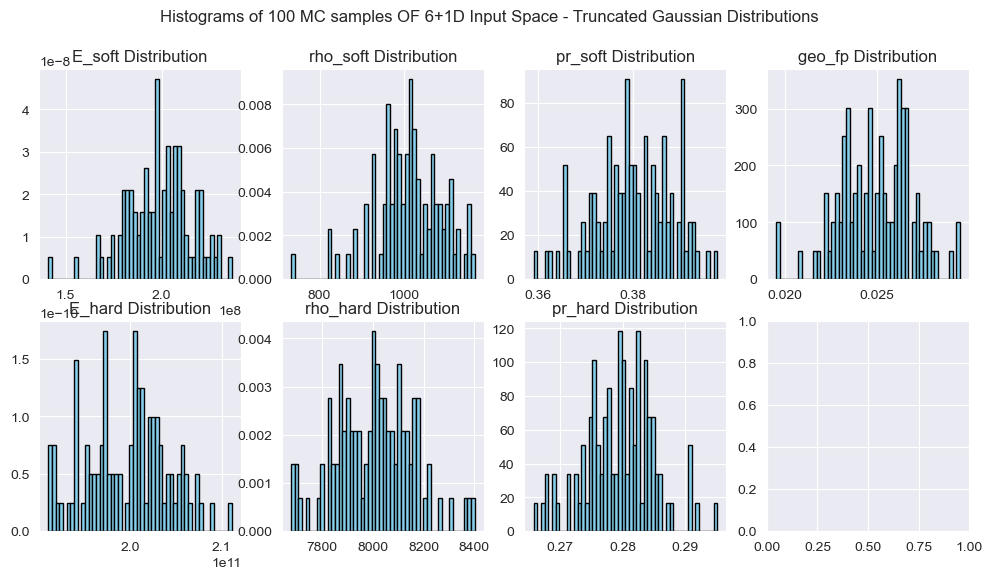

In [3]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[1, 0].hist(E_hard_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('E_hard Distribution')

axes[0, 1].hist(rho_soft_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[0, 2].hist(pr_soft_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 2].set_title('pr_soft Distribution')

axes[1, 2].hist(pr_hard_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 2].set_title('pr_hard Distribution')

axes[0, 3].hist(geo_fp_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 3].set_title('geo_fp Distribution')

title_str = 'Histograms of 100 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 1000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions')

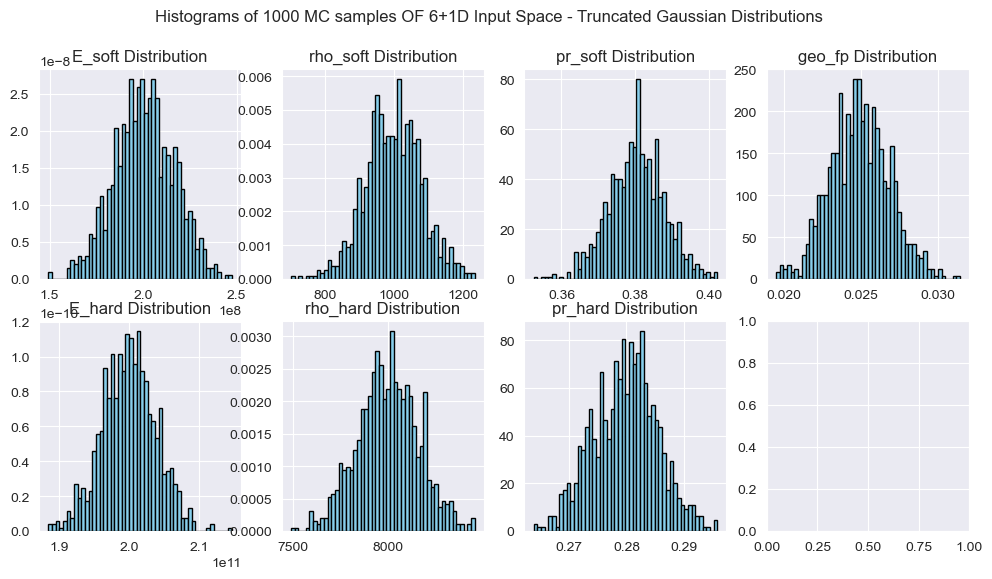

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[1, 0].hist(E_hard_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('E_hard Distribution')

axes[0, 1].hist(rho_soft_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[0, 2].hist(pr_soft_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 2].set_title('pr_soft Distribution')

axes[1, 2].hist(pr_hard_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 2].set_title('pr_hard Distribution')

axes[0, 3].hist(geo_fp_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 3].set_title('geo_fp Distribution')

title_str = 'Histograms of 1000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 10000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions')

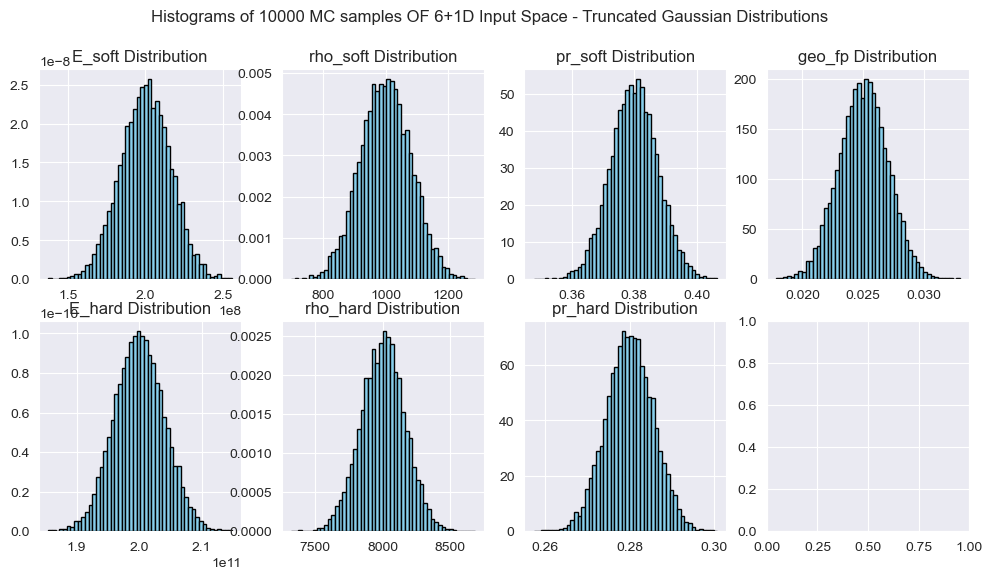

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[1, 0].hist(E_hard_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('E_hard Distribution')

axes[0, 1].hist(rho_soft_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[0, 2].hist(pr_soft_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 2].set_title('pr_soft Distribution')

axes[1, 2].hist(pr_hard_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 2].set_title('pr_hard Distribution')

axes[0, 3].hist(geo_fp_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 3].set_title('geo_fp Distribution')

title_str = 'Histograms of 10000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions'
fig.suptitle(title_str)

In [6]:
#Create truncated variants of Gaussian distributions
E_soft_dist_trunc = cp.TruncNormal(lower=E_s_mean-4*E_s_std, upper=E_s_mean+4*E_s_std, mu=E_s_mean, sigma=E_s_std)
E_hard_dist_trunc = cp.TruncNormal(lower=E_h_mean-4*E_h_std, upper=E_h_mean+4*E_h_std, mu=E_h_mean, sigma=E_h_std)
rho_soft_dist_trunc = cp.TruncNormal(lower=rho_s_mean-4*rho_s_std, upper=rho_s_mean+4*rho_s_std, mu=rho_s_mean, sigma=rho_s_std)
rho_hard_dist_trunc = cp.TruncNormal(lower=rho_h_mean-4*rho_h_std, upper=rho_h_mean+4*rho_h_std, mu=rho_h_mean, sigma=rho_h_std)
pr_soft_dist_trunc = cp.TruncNormal(lower=pr_s_mean-4*pr_s_std, upper=pr_s_mean+4*pr_s_std, mu=pr_s_mean, sigma=pr_s_std)
pr_hard_dist_trunc = cp.TruncNormal(lower=pr_h_mean-4*pr_h_std, upper=pr_h_mean+4*pr_h_std, mu=pr_h_mean, sigma=pr_h_std)
geo_fp_dist_trunc = cp.TruncNormal(lower=geo_fp_mean-4*geo_fp_std, upper=geo_fp_mean+4*geo_fp_std, mu=geo_fp_mean, sigma=geo_fp_std)
joint_dist_trunc = cp.J(E_soft_dist_trunc, E_hard_dist_trunc, rho_soft_dist_trunc, rho_hard_dist_trunc, pr_soft_dist_trunc, pr_hard_dist_trunc, geo_fp_dist_trunc)

Text(0.5, 1.0, 'geo_fp Distribution')

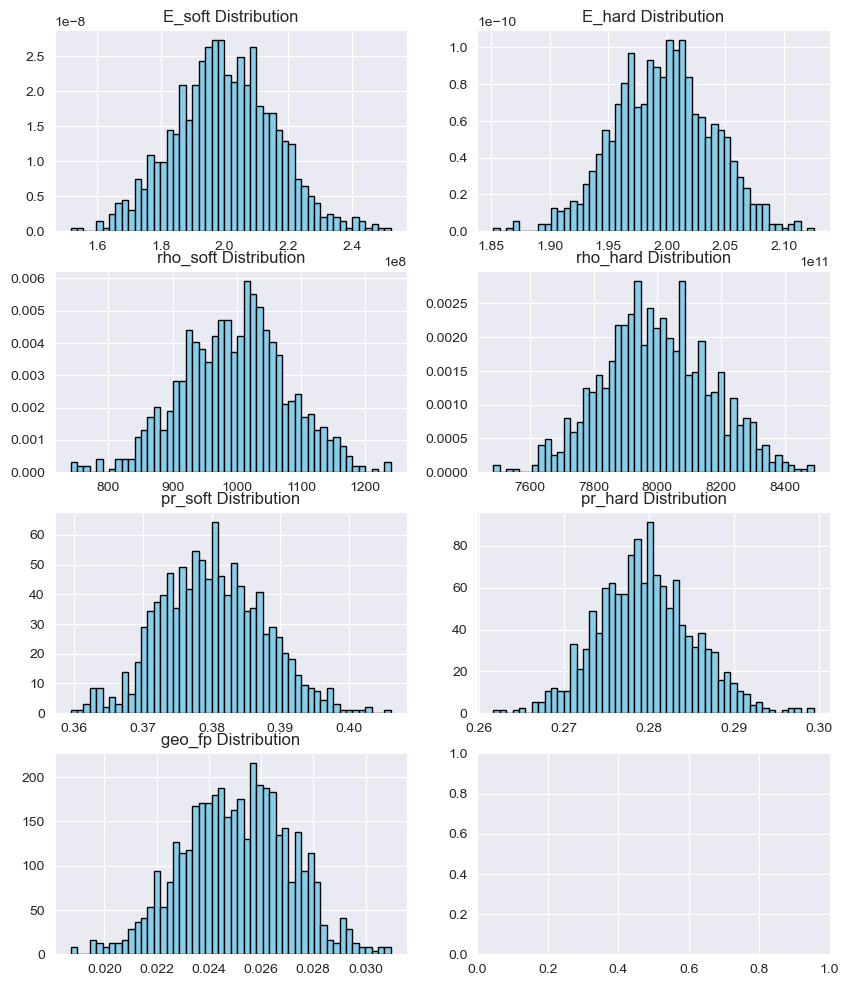

In [7]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[0, 1].hist(E_hard_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('E_hard Distribution')

axes[1, 0].hist(rho_soft_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[2, 0].hist(pr_soft_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[2, 0].set_title('pr_soft Distribution')

axes[2, 1].hist(pr_hard_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[2, 1].set_title('pr_hard Distribution')

axes[3, 0].hist(geo_fp_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[3, 0].set_title('geo_fp Distribution')

In [8]:
### GENERATE QUADRATURE RULE SAMPLES ###
degrees = [1, 2, 3]
#computation points = (degree+1)**(input dimensions)
quadrature_surrogates = {}
quadrature_nodes = {}
quadrature_weights = {}
for d in degrees:
    #nodes, weights = cp.generate_quadrature(d, joint_dist, rule='G')
    nodes, weights = cp.generate_quadrature(d, joint_dist_trunc, rule='G')
    #nodes, weights = cp.quadrature.legendre(order=d, lower=E_soft_dist.lower, upper=E_soft_dist.upper)
    quadrature_nodes[d] = nodes
    quadrature_weights[d] = weights
#quadrature_nodes

for qd in quadrature_nodes:
    #savemat('joint_dist_mat_geo_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_nodes[qd]})
    savemat('joint_dist_mat_geo_trunc_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_nodes[qd]})
    savemat('geo_dist_trunc_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_geos':quadrature_nodes[qd][6]})

print(np.mean(quadrature_nodes[1][6]))

0.025


In [9]:
### GENERATE MONTE CARLO INPUT SAMPLES ###
N_MC2 = 100
N_MC3 = 1000
N_MC4 = 10000

joint_samples_MC2 = joint_dist_trunc.sample(N_MC2)
joint_samples_MC3 = joint_dist_trunc.sample(N_MC3)
joint_samples_MC4 = joint_dist_trunc.sample(N_MC4)

savemat('joint_dist_trunc_mc_'+str(N_MC2)+'.mat',{'mc_'+str(N_MC2)+'_inputs':joint_samples_MC2})
savemat('joint_dist_trunc_mc_'+str(N_MC3)+'.mat',{'mc_'+str(N_MC3)+'_inputs':joint_samples_MC3})
savemat('joint_dist_trunc_mc_'+str(N_MC4)+'.mat',{'mc_'+str(N_MC4)+'_inputs':joint_samples_MC4})

In [10]:
print(joint_samples_MC2.shape)
print(joint_samples_MC2[-1::].shape)
geo_fp_dist_trunc_MC2 = joint_samples_MC2[-1::]
geo_fp_dist_trunc_MC3 = joint_samples_MC3[-1::]
geo_fp_dist_trunc_MC4 = joint_samples_MC4[-1::]

savemat('geo_fp_dist_trunc_mc_'+str(N_MC2)+'.mat',{'mc_'+str(N_MC2)+'_geos':geo_fp_dist_trunc_MC2})
savemat('geo_fp_dist_trunc_mc_'+str(N_MC3)+'.mat',{'mc_'+str(N_MC3)+'_geos':geo_fp_dist_trunc_MC3})
savemat('geo_fp_dist_trunc_mc_'+str(N_MC4)+'.mat',{'mc_'+str(N_MC4)+'_geos':geo_fp_dist_trunc_MC4})

(7, 100)
(1, 100)


QUADRATURE INPUT DISTRIBUTIONS GENERATED - MATLAB RUNS COMMENCE

In [11]:
E_soft_sample_sets = {}
E_hard_sample_sets = {}
rho_soft_sample_sets = {}
rho_hard_sample_sets = {}
pr_soft_sample_sets = {}
pr_hard_sample_sets = {}
geo_fp_sample_sets = {}
bg_size_sample_sets = {}
bg_top_sample_sets = {}
bg_bottom_sample_sets = {}
bg_center_sample_sets = {}

for d in degrees:
    folder_name = 'gaussian 6+1 inputs quadrature rule 2nd geo study'#+str(d)
    #file_suffix = '_q_pd'+str(d)+'_uniform_'+str((d+1)**6)+'.mat'
    file_suffix ='_gaussian_7d_fp_5%_n'+str((d+1)**7)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)

    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[d] = E_soft_file['E_soft'][:]
    E_hard_sample_sets[d] = E_hard_file['E_hard'][:]
    rho_soft_sample_sets[d] = rho_soft_file['rho_soft'][:]
    rho_hard_sample_sets[d] = rho_hard_file['rho_hard'][:]
    pr_soft_sample_sets[d] = pr_soft_file['pr_soft'][:]
    pr_hard_sample_sets[d] = pr_hard_file['pr_hard'][:]

    bg_size_sample_sets[d] = bg_size_file['bg_size'][:]
    bg_top_sample_sets[d] = bg_top_file['bg_top'][:]
    bg_bottom_sample_sets[d] = bg_bottom_file['bg_bottom'][:]
    bg_center_sample_sets[d] = (bg_top_sample_sets[d]+bg_bottom_sample_sets[d])/2

In [12]:
E_soft_MC_sets = {}
E_hard_MC_sets = {}
rho_soft_MC_sets = {}
rho_hard_MC_sets = {}
pr_soft_MC_sets = {}
pr_hard_MC_sets = {}
geo_fp_MC_sets = {}
bg_size_MC_sets = {}
bg_top_MC_sets = {}
bg_bottom_MC_sets = {}
bg_center_MC_sets = {}

set_N = [100, 1000, 10000]
for N in set_N:
    folder_name = 'gaussian 6+1 inputs mc 2nd geo study'#+str(N)
    #file_suffix = '_mc_uniform_'+str(N)+'.mat'
    file_suffix = '_gaussian_7d_fp_5%_n'+str(N)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    geo_fp_file = loadmat(folder_name+'/geo_fp'+'_dist_trunc_mc_'+str(N)+'.mat')
    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_MC_sets[N] = E_soft_file['E_soft'][:]
    E_hard_MC_sets[N] = E_hard_file['E_hard'][:]
    rho_soft_MC_sets[N] = rho_soft_file['rho_soft'][:]
    rho_hard_MC_sets[N] = rho_hard_file['rho_hard'][:]
    pr_soft_MC_sets[N] = pr_soft_file['pr_soft'][:]
    pr_hard_MC_sets[N] = pr_hard_file['pr_hard'][:]
    geo_fp_MC_sets[N] = geo_fp_file['mc_'+str(N)+'_geos'][:].T
    bg_size_MC_sets[N] = bg_size_file['bg_size'][:]
    bg_top_MC_sets[N] = bg_top_file['bg_top'][:]
    bg_bottom_MC_sets[N] = bg_bottom_file['bg_bottom'][:]
    bg_center_MC_sets[N] = (bg_top_MC_sets[N] + bg_bottom_MC_sets[N])/2

In [13]:
print(type(bg_center_sample_sets))
print(len(bg_center_sample_sets[3]))

print(type(bg_center_MC_sets))
print(len(bg_center_MC_sets[10000]))

print(type(geo_fp_MC_sets))
print(len(geo_fp_MC_sets[10000]))
print(geo_fp_MC_sets[1000].shape)
print(rho_hard_MC_sets[1000].shape)
# fig = plt.figure()
# plt.scatter(E_soft_sample_sets[2], bg_size_sample_sets[2])
# plt.title('Black Box Model Evaluations on 2th order quadrature samples')
# plt.xlabel('E_soft')
# plt.ylabel('bg_size')

<class 'dict'>
16384
<class 'dict'>
10000
<class 'dict'>
10000
(1000, 1)
(1000, 1)


Quadrature fits on bandgap size

In [14]:
### FIT SURROGATE MODELS - QUADRATURE RULE ###
q_surrogates_bgs = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_size_sample_sets[degree]
    )
    q_surrogates_bgs[degree] = polynomial_approximation

In [15]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test = 1000
joint_test = joint_dist_trunc.sample(N_test)
print(joint_test.shape)
#print(joint_test[0])
surrogate_outputs = {}
surrogate_kdes = {}
surrogate_pdf = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgs[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs[degree] = surrogate_model.__call__(joint_test).astype(float)
    surrogate_outputs[degree] = surrogate_model(
        q0=joint_test[0,:], q1=joint_test[1,:],
        q2=joint_test[2,:], q3=joint_test[3,:],
        q4=joint_test[4,:], q5=joint_test[5,:], q6=joint_test[6,:])
    #print(surrogate_outputs[degree])
    surrogate_kdes[degree] = gaussian_kde(surrogate_outputs[degree])
    surrogate_pdf[degree] = surrogate_kdes[degree](np.linspace(np.min(surrogate_outputs[degree]), np.max(surrogate_outputs[degree]), 1000))

(7, 1000)


Text(0.5, 0.98, 'Bandgap Size Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

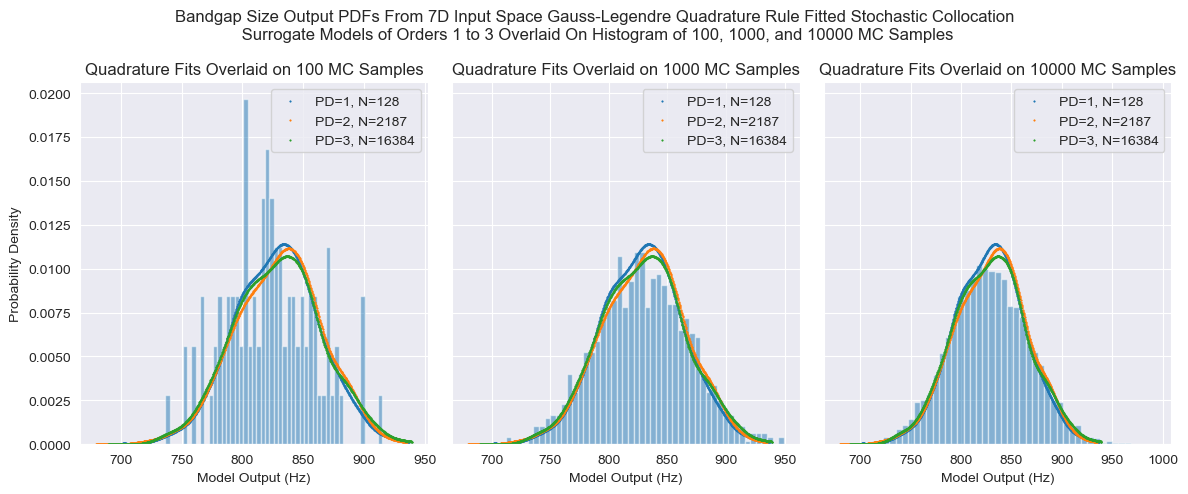

In [16]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap top

In [17]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP TOP ###
q_surrogates_bgt = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_top_sample_sets[degree]
    )
    q_surrogates_bgt[degree] = polynomial_approximation

In [18]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgt = 1000
joint_test_bgt = joint_dist_trunc.sample(N_test_bgt)
print(joint_test_bgt.shape)
#print(joint_test_bgt[0])
surrogate_outputs_bgt = {}
surrogate_kdes_bgt = {}
surrogate_pdf_bgt = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgt[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgt[degree] = surrogate_model.__call__(joint_test_bgt).astype(float)
    surrogate_outputs_bgt[degree] = surrogate_model(
        q0=joint_test_bgt[0,:], q1=joint_test_bgt[1,:],
        q2=joint_test_bgt[2,:], q3=joint_test_bgt[3,:],
        q4=joint_test_bgt[4,:], q5=joint_test_bgt[5,:], q6=joint_test_bgt[6,:])
    #print(surrogate_outputs_bgt[degree])
    surrogate_kdes_bgt[degree] = gaussian_kde(surrogate_outputs_bgt[degree])
    surrogate_pdf_bgt[degree] = surrogate_kdes_bgt[degree](np.linspace(np.min(surrogate_outputs_bgt[degree]), np.max(surrogate_outputs_bgt[degree]), 1000))

(7, 1000)


Text(0.5, 0.98, 'Bandgap Top Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

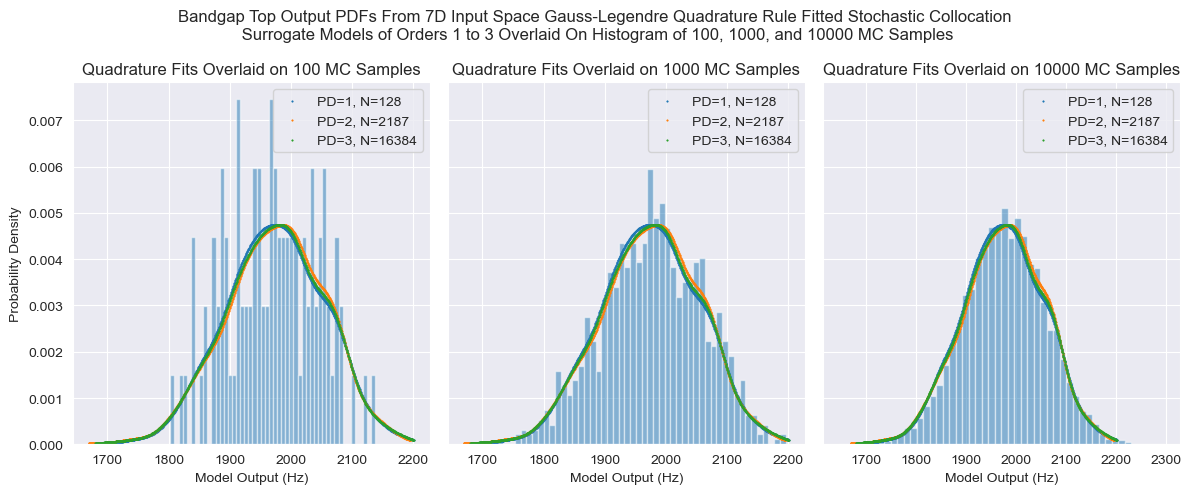

In [19]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), 1000), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), 1000), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), 1000), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap bottom

In [20]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP BOTTOM ###
q_surrogates_bgb = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_bottom_sample_sets[degree]
    )
    q_surrogates_bgb[degree] = polynomial_approximation

In [21]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgb = 1000
joint_test_bgb = joint_dist_trunc.sample(N_test_bgb)
print(joint_test_bgb.shape)
#print(joint_test_bgb[0])
surrogate_outputs_bgb = {}
surrogate_kdes_bgb = {}
surrogate_pdf_bgb = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgb[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgb[degree] = surrogate_model.__call__(joint_test_bgb).astype(float)
    surrogate_outputs_bgb[degree] = surrogate_model(
        q0=joint_test_bgb[0,:], q1=joint_test_bgb[1,:],
        q2=joint_test_bgb[2,:], q3=joint_test_bgb[3,:],
        q4=joint_test_bgb[4,:], q5=joint_test_bgb[5,:], q6=joint_test_bgb[6,:])
    #print(surrogate_outputs_bgb[degree])
    surrogate_kdes_bgb[degree] = gaussian_kde(surrogate_outputs_bgb[degree])
    surrogate_pdf_bgb[degree] = surrogate_kdes_bgb[degree](np.linspace(np.min(surrogate_outputs_bgb[degree]), np.max(surrogate_outputs_bgb[degree]), 1000))

(7, 1000)


Text(0.5, 0.98, 'Bandgap Bottom Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

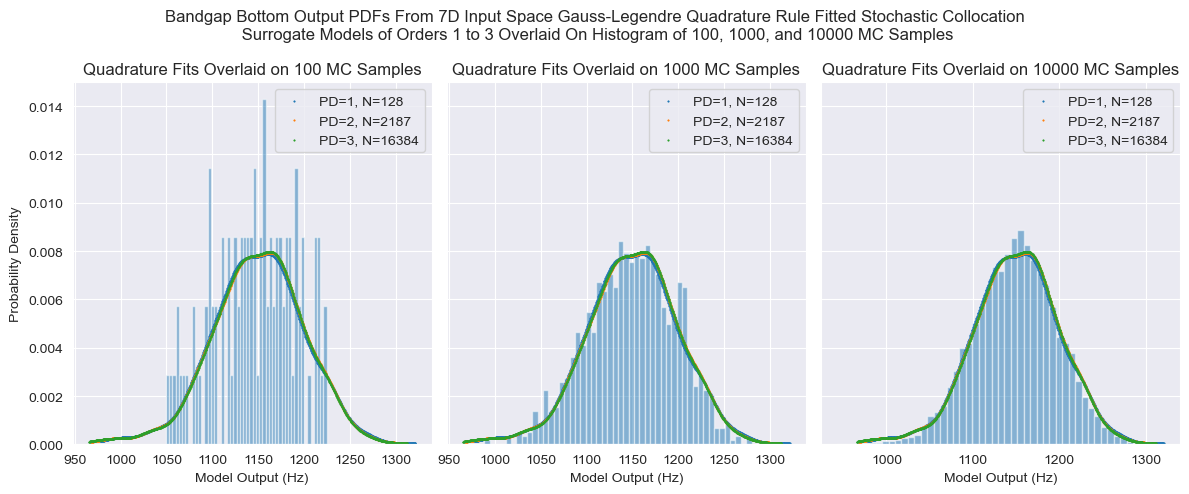

In [22]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), 1000), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), 1000), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), 1000), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap center

In [23]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP CENTER ###
q_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_center_sample_sets[degree]
    )
    q_surrogates_bgc[degree] = polynomial_approximation

In [24]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgc = 1000
joint_test_bgc = joint_dist_trunc.sample(N_test_bgc)
print(joint_test_bgc.shape)
#print(joint_test_bgc[0])
surrogate_outputs_bgc = {}
surrogate_kdes_bgc = {}
surrogate_pdf_bgc = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgc[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgc[degree] = surrogate_model.__call__(joint_test_bgc).astype(float)
    surrogate_outputs_bgc[degree] = surrogate_model(
        q0=joint_test_bgc[0,:], q1=joint_test_bgc[1,:],
        q2=joint_test_bgc[2,:], q3=joint_test_bgc[3,:],
        q4=joint_test_bgc[4,:], q5=joint_test_bgc[5,:], q6=joint_test_bgc[6,:])
    #print(surrogate_outputs_bgc[degree])
    surrogate_kdes_bgc[degree] = gaussian_kde(surrogate_outputs_bgc[degree])
    surrogate_pdf_bgc[degree] = surrogate_kdes_bgc[degree](np.linspace(np.min(surrogate_outputs_bgc[degree]), np.max(surrogate_outputs_bgc[degree]), 1000))

(7, 1000)


Text(0.5, 0.98, 'Bandgap Center Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

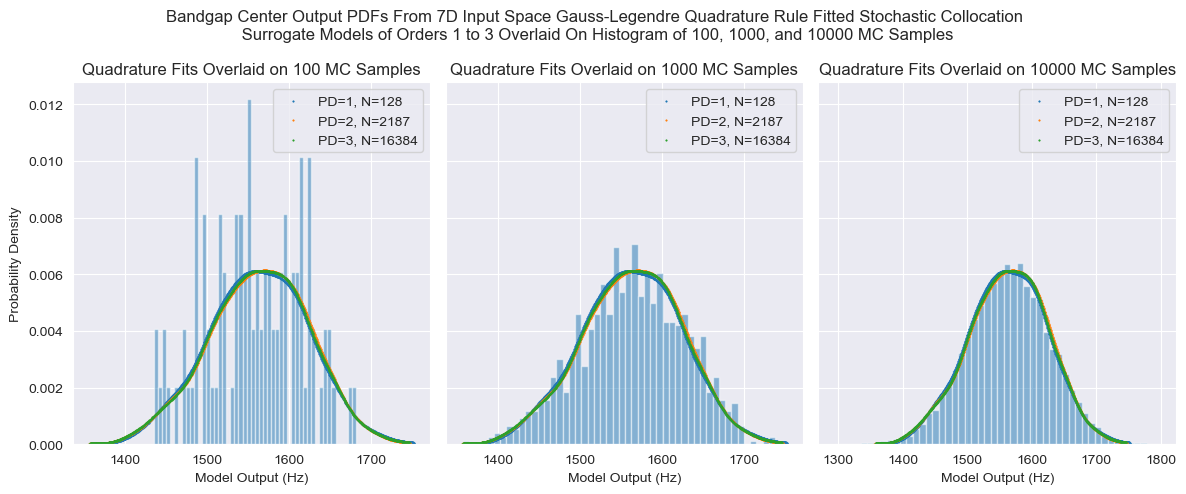

In [25]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), 1000), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), 1000), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), 1000), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Alternative Graphs

Text(0.5, 0.98, "Histograms of 100, 1000, & 10000 MC Samples' Computed Bandgap Top, Bottom,\n and Center Locations For 7D Input Space, Gaussian Distributions")

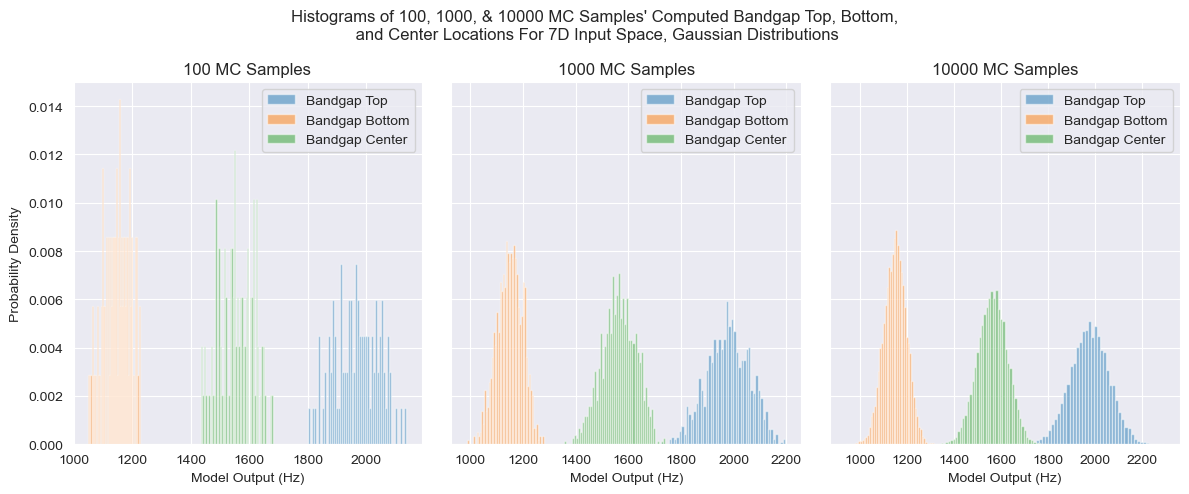

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Center')
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Center')
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Center')
# axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
# axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
# axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top, Bottom,\n and Center Locations For 7D Input Space, Gaussian Distributions'
fig.suptitle(title_str)


Text(0.5, 0.98, "Histograms of 100, 1000, & 10000 MC Samples' Computed Bandgap Top and Bottom Locations\n and Bandgap Size For 7D Input Space, Gaussian Distributions")

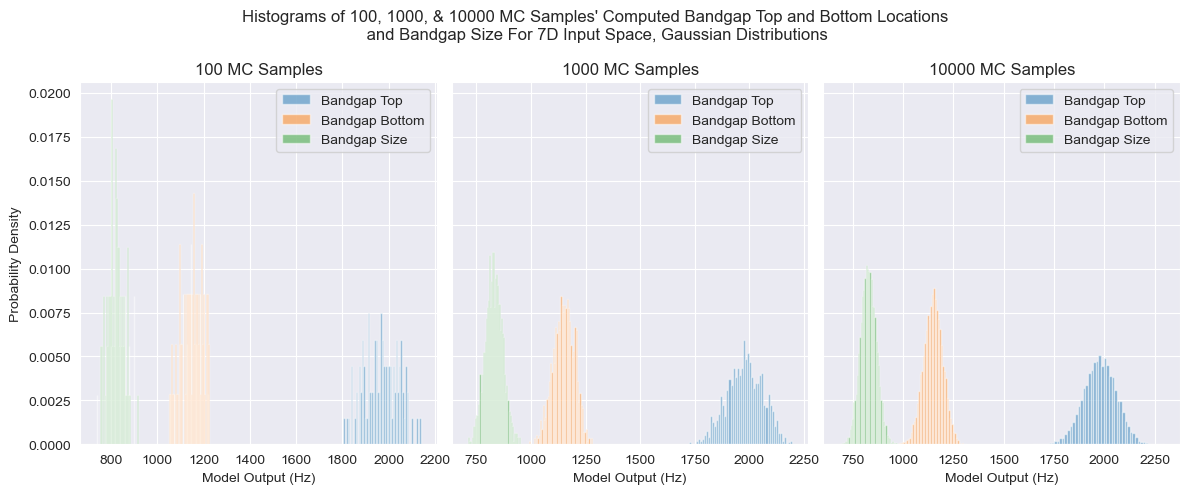

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Size')
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Size')
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Size')

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top and Bottom Locations\n and Bandgap Size For 7D Input Space, Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, "Histograms of 100, 1000, & 10000 MC Samples' Computed Bandgap Top\n and Bottom Locations For 7D Input Space, Gaussian Distributions")

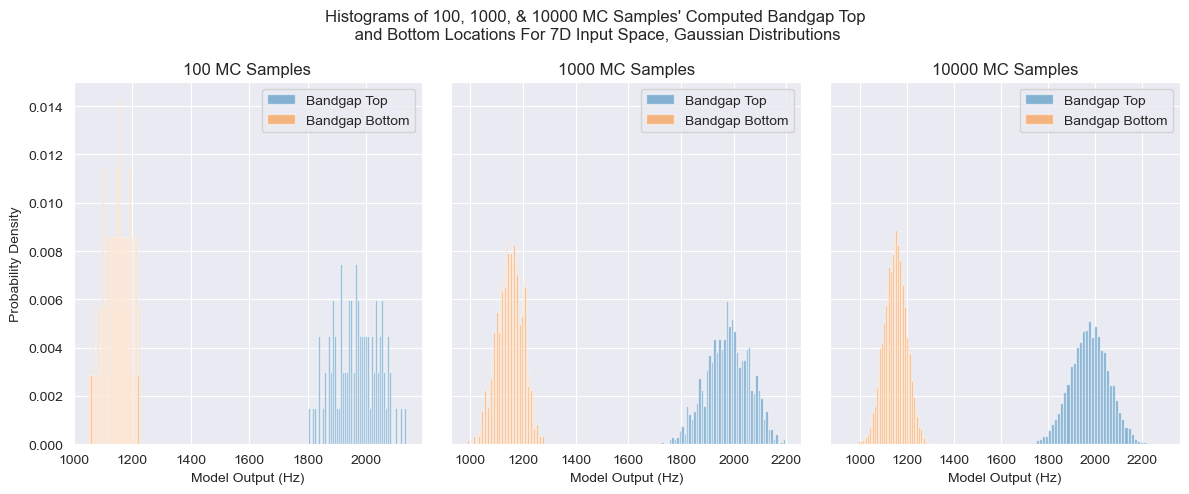

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top\n and Bottom Locations For 7D Input Space, Gaussian Distributions'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Size

In [32]:
MC_inputs = {}
# MC_inputs[N_MC2] = joint_samples_MC2
# MC_inputs[N_MC3] = joint_samples_MC3
# MC_inputs[N_MC4] = joint_samples_MC4
for n in set_N:
    MC_inputs[n] = np.hstack((
        E_soft_MC_sets[n],
        E_hard_MC_sets[n],
        rho_soft_MC_sets[n],
        rho_hard_MC_sets[n],
        pr_soft_MC_sets[n],
        pr_hard_MC_sets[n],
        geo_fp_MC_sets[n]
    ))

MC_degrees = {}
MC_degrees[N_MC2] = np.array([1,2,3,4])
MC_degrees[N_MC3] = np.array([1,2,3,4])
MC_degrees[N_MC4] = np.array([1,2,3,4])
print(E_soft_MC_sets[100].shape)
print(MC_inputs[N_MC2].shape)
print(MC_inputs[N_MC3].shape)
print(MC_inputs[N_MC4].shape)
print(type(MC_degrees))
print(type(MC_degrees[N_MC2]))

(100, 1)
(100, 7)
(1000, 7)
(10000, 7)
<class 'dict'>
<class 'numpy.ndarray'>


In [33]:
# r_surrogates_bgs_MC_100 = {}
# for degree in MC_degrees[N_MC2]:
#     polynomial_basis = cp.expansion.stieltjes(
#         order=degree,
#         dist=joint_dist_trunc,
#         normed=True
#     )
#     # print(fit_input.shape)
#     # print(bg_size_MC_sets[100].shape)
#     polynomial_approximation = cp.fit_regression(
#         polynomials=polynomial_basis,
#         abscissas=MC_inputs[N_MC2],
#         evals=bg_size_MC_sets[N_MC2],
#     )
#     r_surrogates_bgs_MC_100[degree] = polynomial_approximation

In [34]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgs = {}
for n in set_N:
    print(n)
    r_surrogates_bgs[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_size_MC_sets[n],
        )
        r_surrogates_bgs[n][degree] = polynomial_approximation

100
1000
10000


In [35]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgs[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

Text(0.5, 0.98, 'Bandgap Size Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

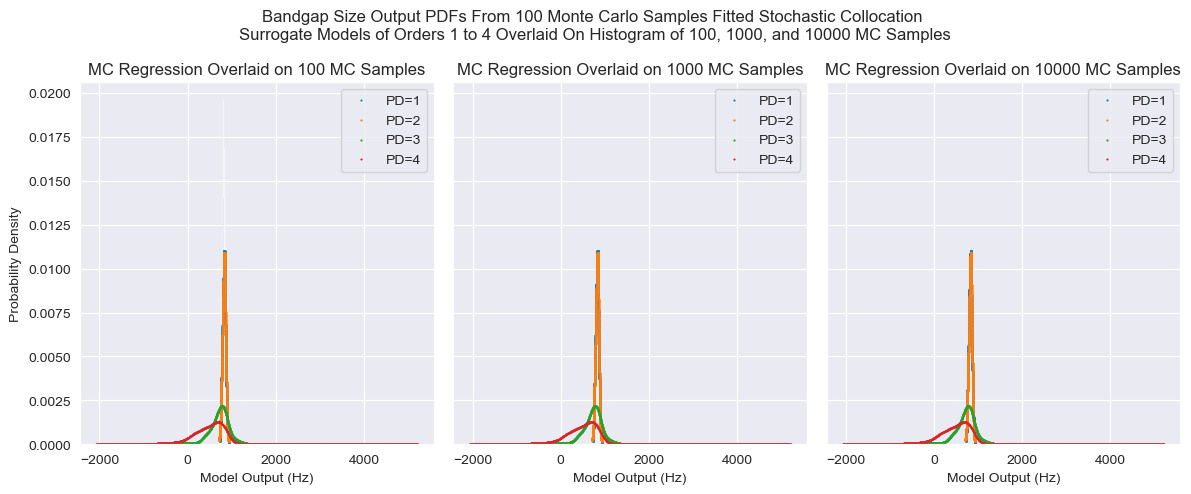

In [36]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Size Output PDFs From 1000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

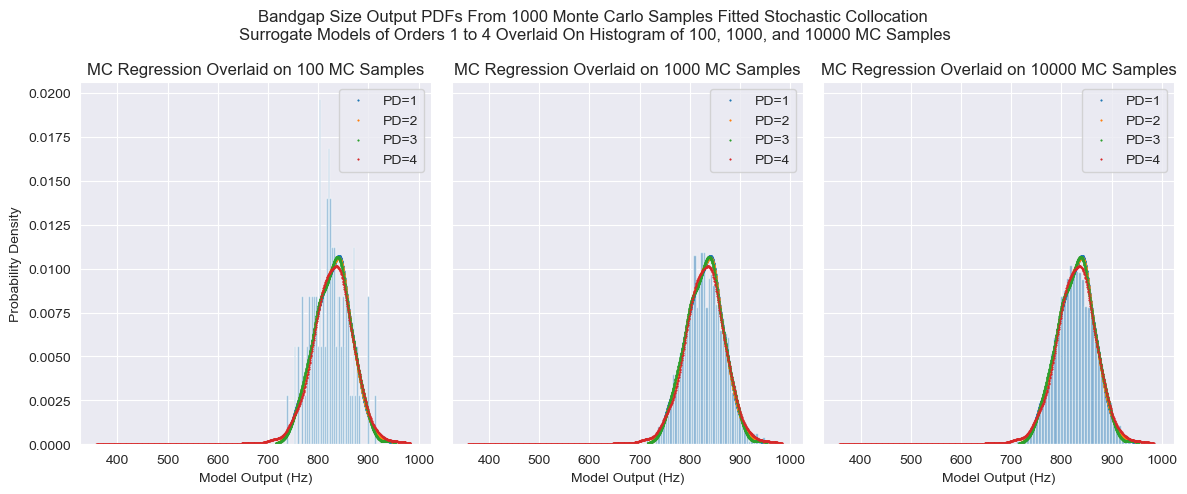

In [37]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Size Output PDFs From 10000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

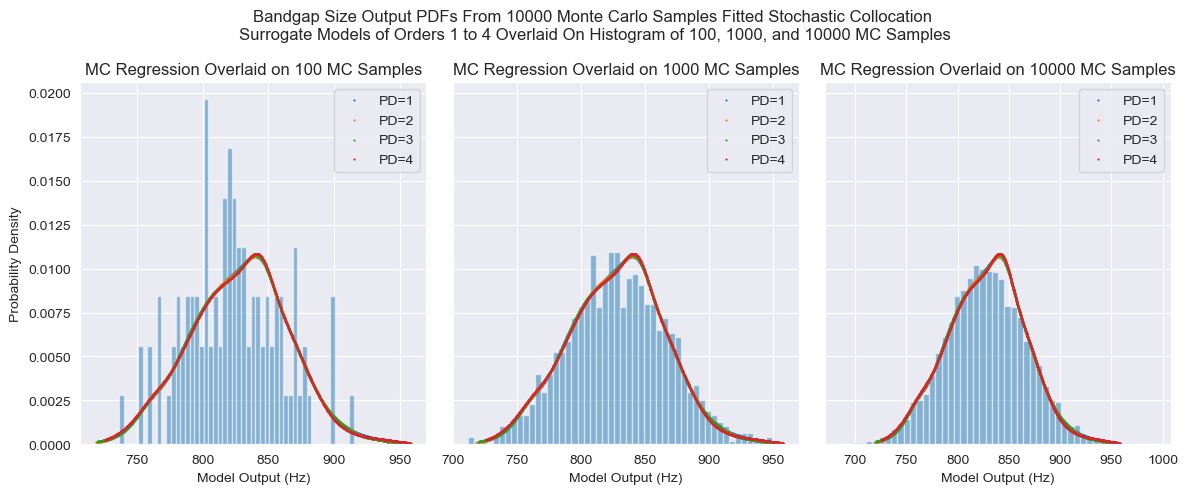

In [38]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Top

In [39]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgt = {}
for n in set_N:
    print(n)
    r_surrogates_bgt[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_top_MC_sets[n],
        )
        r_surrogates_bgt[n][degree] = polynomial_approximation

100
1000
10000


In [40]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgt[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

Text(0.5, 0.98, 'Bandgap Top Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

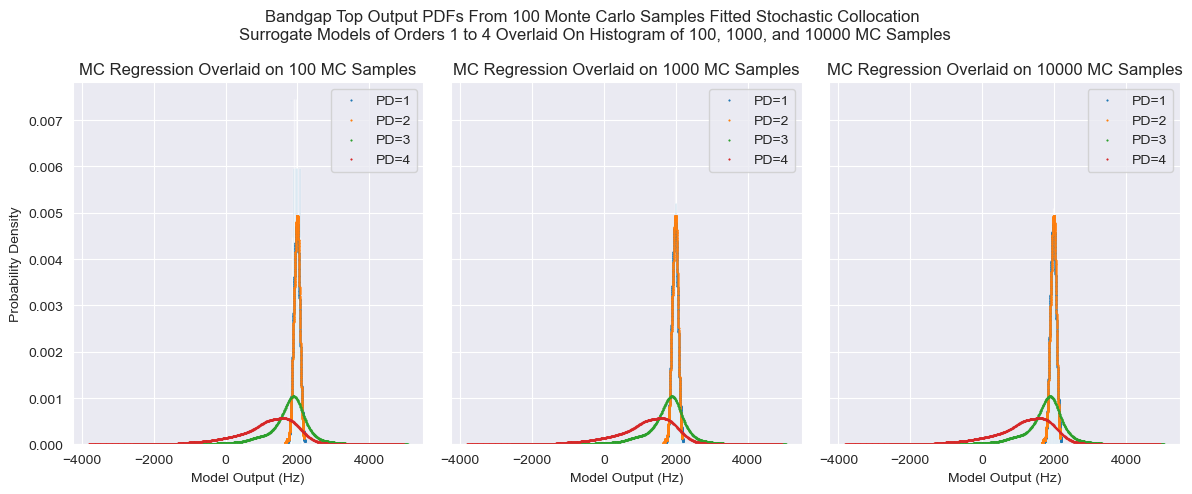

In [41]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Top Output PDFs From 1000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

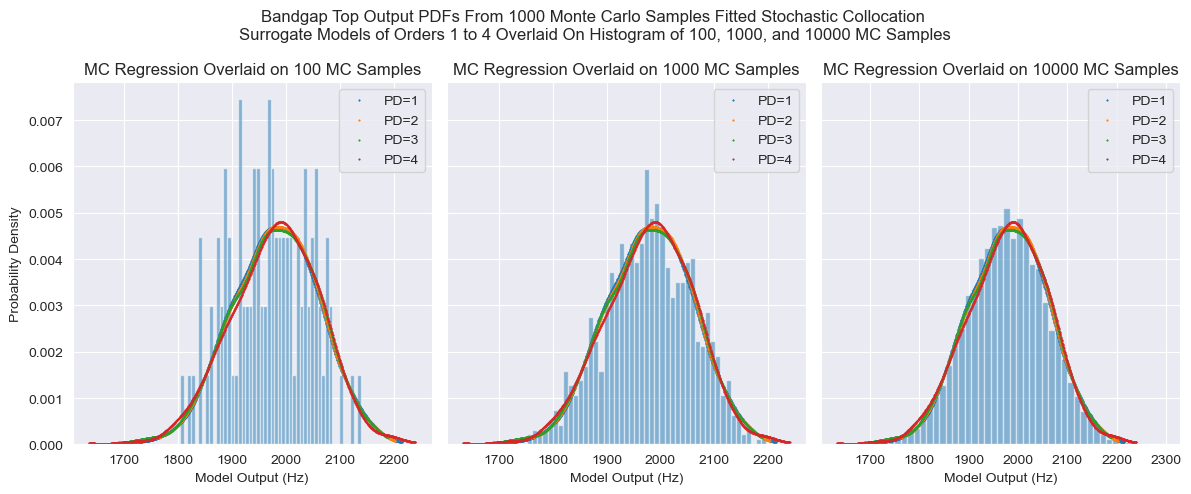

In [42]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Top Output PDFs From 10000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

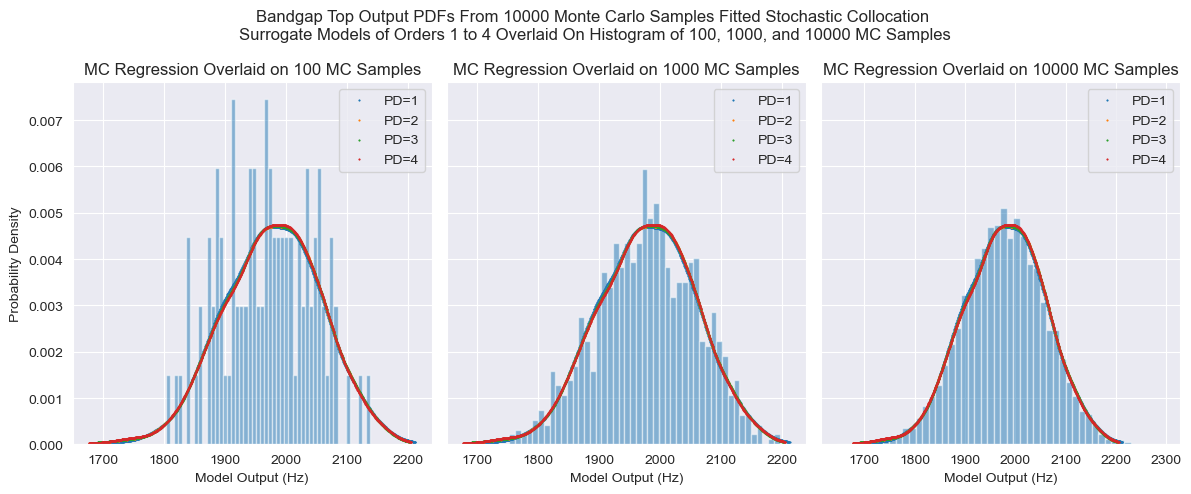

In [43]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Bottom


In [44]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgb = {}
for n in set_N:
    print(n)
    r_surrogates_bgb[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_bottom_MC_sets[n],
        )
        r_surrogates_bgb[n][degree] = polynomial_approximation

100
1000
10000


In [45]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgb[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

Text(0.5, 0.98, 'Bandgap Bottom Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

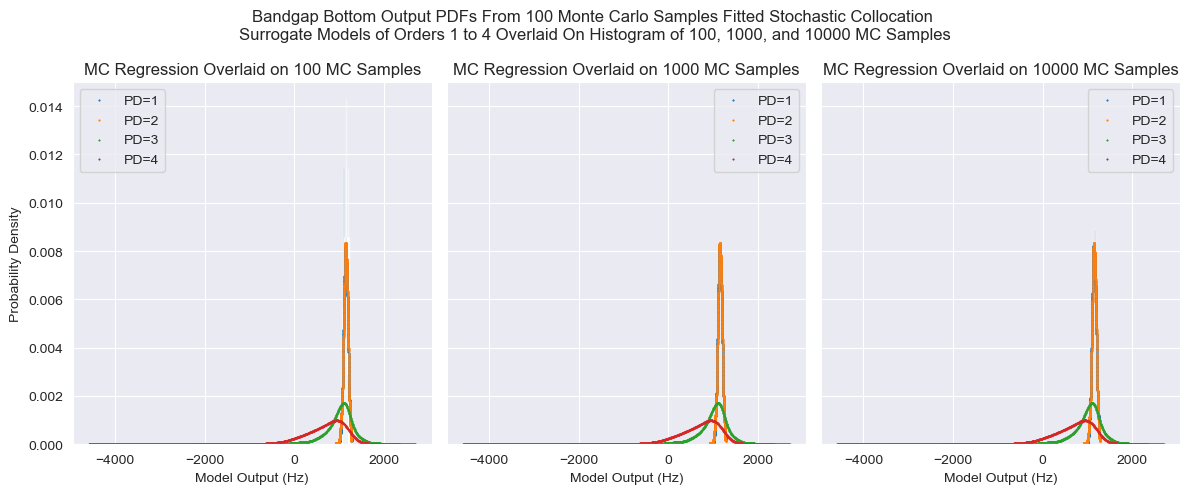

In [46]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Bottom Output PDFs From 1000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

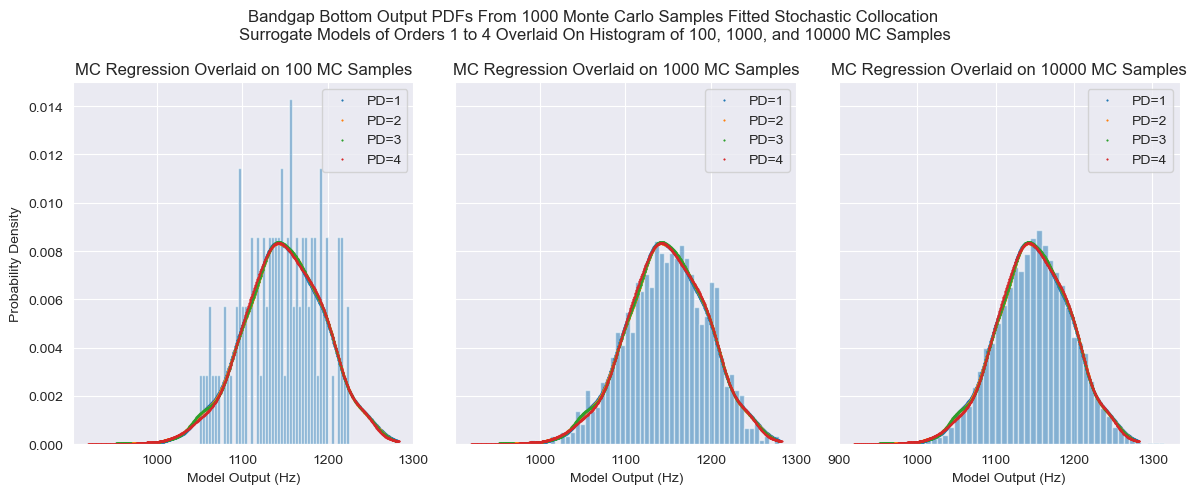

In [47]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Bottom Output PDFs From 10000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

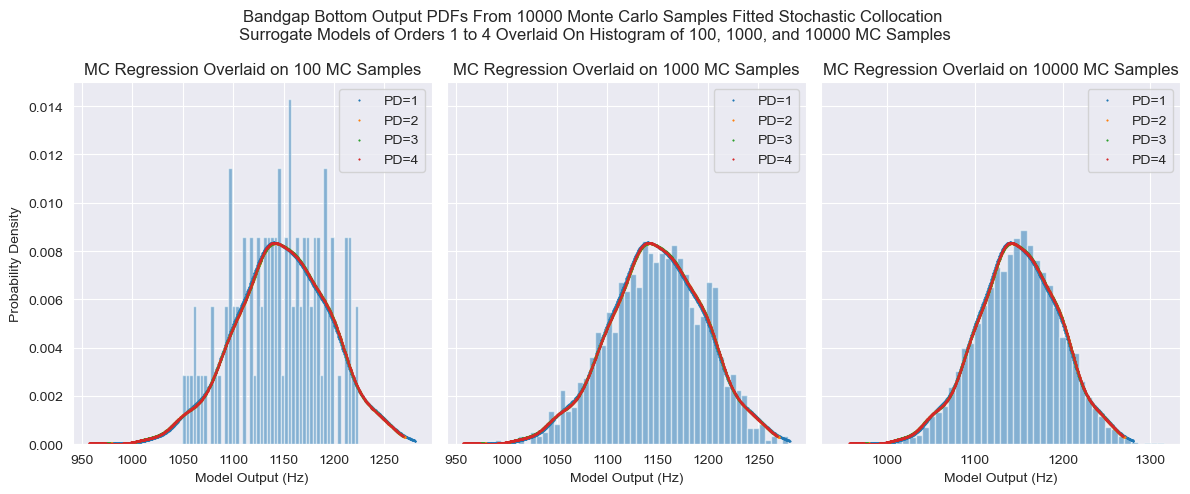

In [48]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Center

In [49]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgc = {}
for n in set_N:
    print(n)
    r_surrogates_bgc[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_center_MC_sets[n],
        )
        r_surrogates_bgc[n][degree] = polynomial_approximation

100
1000
10000


In [50]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgc[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

Text(0.5, 0.98, 'Bandgap Center Output PDFs From 100 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

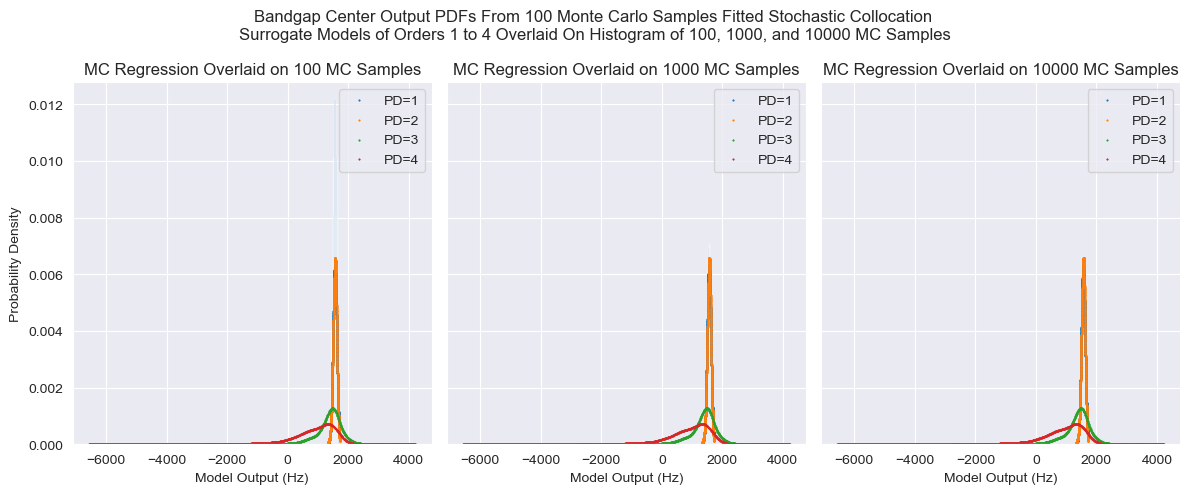

In [51]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Center Output PDFs From 1000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

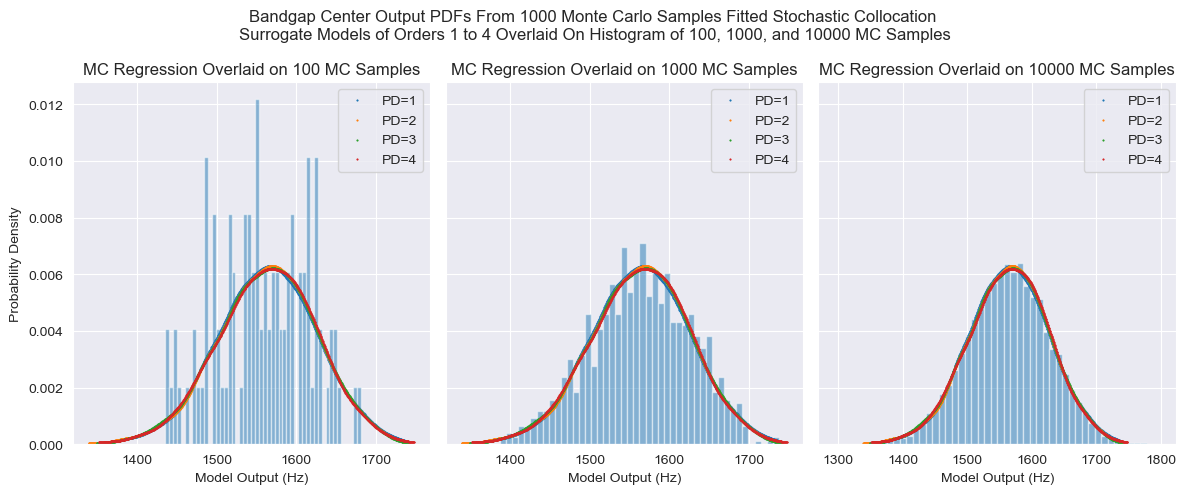

In [52]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Bandgap Center Output PDFs From 10000 Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders 1 to 4 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

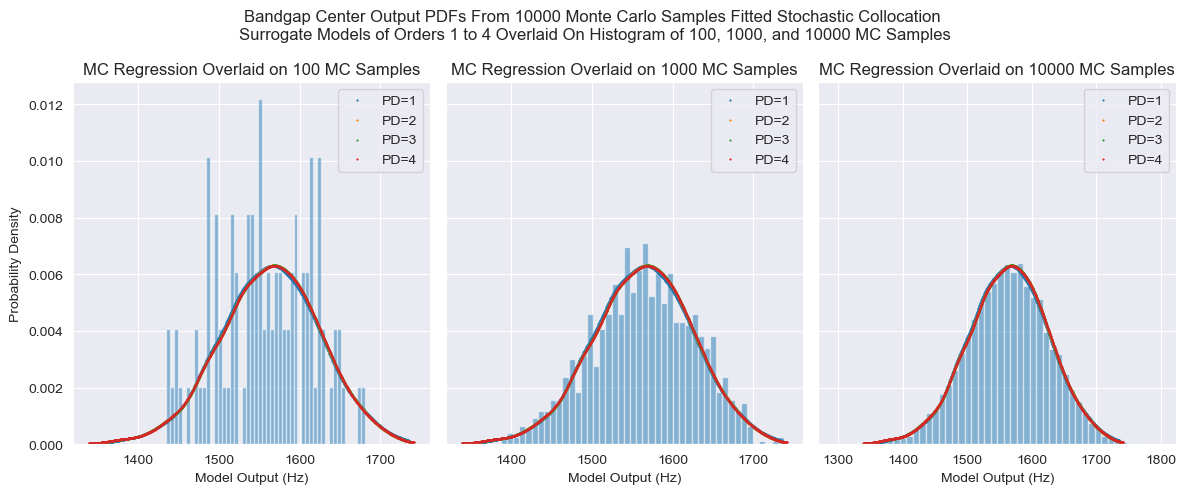

In [53]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

2D HISTOGRAMS (BANDGAP SIZE & CENTER)

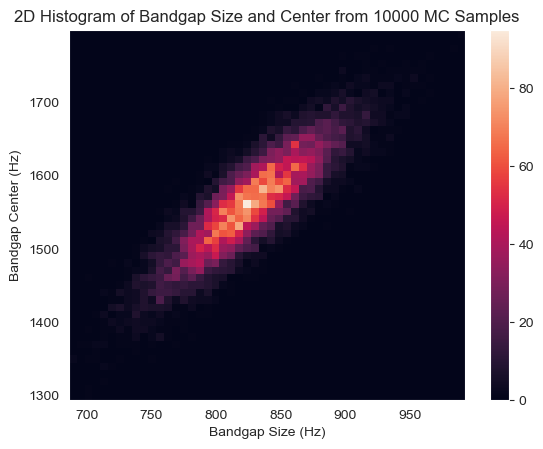

In [54]:
fig = plt.subplots()
plt.hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from 10000 MC Samples')
plt.show()

In [55]:
print(degrees)
print(MC_degrees[1000])
intersection_degrees = np.intersect1d(degrees, MC_degrees[1000])
print(intersection_degrees)

[1, 2, 3]
[1 2 3 4]
[1 2 3]


In [56]:
#joint_output_dist = cp.J(bg_size_dist, bg_center_dist)
N_test_4 = 10**4
joint_test_4 = joint_dist_trunc.sample(N_test_4)
surrogate_outputs_q_bgs = {}
surrogate_outputs_q_bgc = {}
surrogate_outputs_r_bgs = {}
surrogate_outputs_r_bgc = {}

for degree in intersection_degrees:
    surrogate_model_q_bgs = q_surrogates_bgs[degree]
    surrogate_outputs_q_bgs[degree] = surrogate_model_q_bgs(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

    surrogate_model_q_bgc = q_surrogates_bgc[degree]
    surrogate_outputs_q_bgc[degree] = surrogate_model_q_bgc(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

    surrogate_model_r_bgs = r_surrogates_bgs[N_MC3][degree]
    surrogate_outputs_r_bgs[degree] = surrogate_model_r_bgs(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

    surrogate_model_r_bgc = r_surrogates_bgc[N_MC3][degree]
    surrogate_outputs_r_bgc[degree] = surrogate_model_r_bgc(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

print(surrogate_outputs_q_bgs.keys())

dict_keys([1, 2, 3])


(10000,)


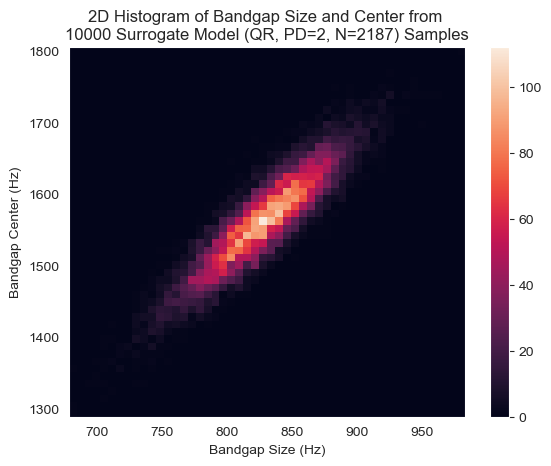

In [57]:
pd = 2
fig = plt.subplots()
plt.hist2d(surrogate_outputs_q_bgs[pd].flatten(), surrogate_outputs_q_bgc[pd].flatten(), bins=(50, 50))
print(surrogate_outputs_q_bgs[pd].flatten().shape)
plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from \n10000 Surrogate Model (QR, PD=2, N='+str(len(bg_size_sample_sets[2].flatten()))+') Samples')
plt.show()

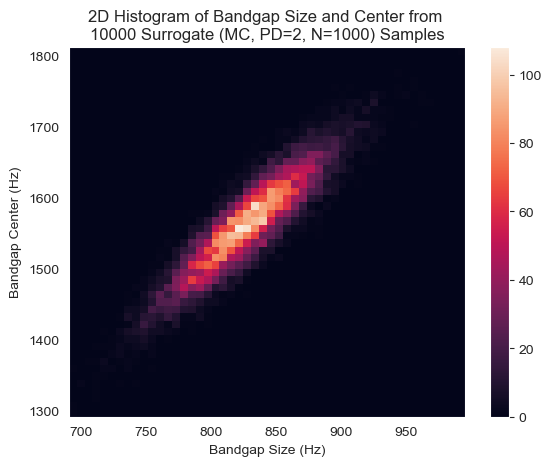

In [58]:
pd = 2
fig = plt.subplots()
plt.hist2d(surrogate_outputs_r_bgs[pd].flatten(), surrogate_outputs_r_bgc[pd].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from \n10000 Surrogate (MC, PD=2, N='+str(len(bg_size_MC_sets[1000].flatten()))+') Samples')
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]]), array([685.99815738, 692.13781305, 698.27746872, 704.4171244 ,
       710.55678007, 716.69643574, 722.83609142, 728.97574709,
       735.11540276, 741.25505844, 747.39471411, 753.53436978,
       759.67402545, 765.81368113, 771.9533368 , 778.09299247,
       784.23264815, 790.37230382, 796.51195949, 802.65161516,
       808.79127084, 814.93092651, 821.07058218, 827.21023786,
       833.34989353, 839.4895492 , 845.62920488, 851.76886055,
       857.90851622, 864.04817189, 870.18782757, 876.32748324,
       882.46713891, 888.60679459, 894.74645026, 900.88610593,
       907.0257616 , 913.16541728, 919.30507295, 925.44472862,
       931.5843843 , 937.72403997, 943.86369564, 950.00335131,
       956.14300699, 962.28266266, 968.42231833, 974.56197401,
 

Text(0.5, 0.98, '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model')

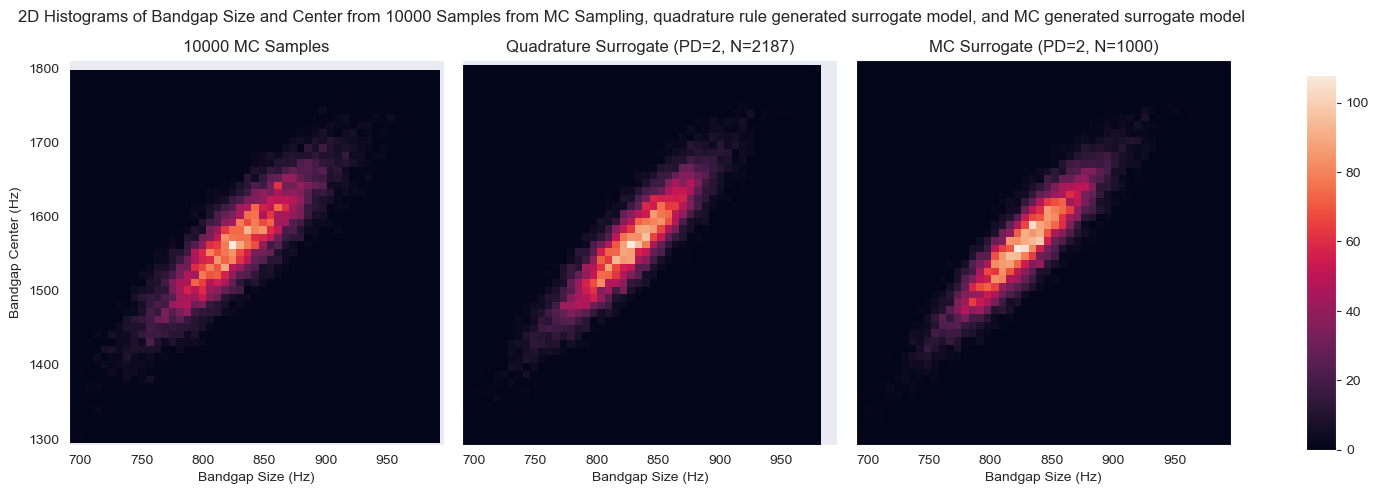

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
pd = 2
hist_mc_samples = axs[0].hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50))
hist_q_gen = axs[1].hist2d(surrogate_outputs_q_bgs[pd].flatten(), surrogate_outputs_q_bgc[pd].flatten(), bins=(50, 50))
hist_mc_gen = axs[2].hist2d(surrogate_outputs_r_bgs[pd].flatten(), surrogate_outputs_r_bgc[pd].flatten(), bins=(50, 50))

print(hist_mc_samples)
axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Bandgap Center (Hz)")
axs[0].set_title('10000 MC Samples')
#axs[0].set_aspect('equal')

axs[1].set_xlabel("Bandgap Size (Hz)")
#axs[1].set_ylabel("Bandgap Center (Hz)")
axs[1].set_title('Quadrature Surrogate (PD='+str(pd)+', N='+str(len(bg_size_sample_sets[pd].flatten()))+')')
#axs[1].set_aspect('equal')

axs[2].set_xlabel("Bandgap Size (Hz)")
#axs[2].set_ylabel("Bandgap Center (Hz)")
axs[2].set_title('MC Surrogate (PD='+str(pd)+', N='+str(len(bg_size_MC_sets[1000].flatten()))+')')
#axs[2].set_aspect('equal')

cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
fig.colorbar(hist_mc_gen[3], cax=cbar_ax)
plt.subplots_adjust(wspace=0.05)

title_str = '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model'
fig.suptitle(title_str)

Text(0.5, 0.98, '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model')

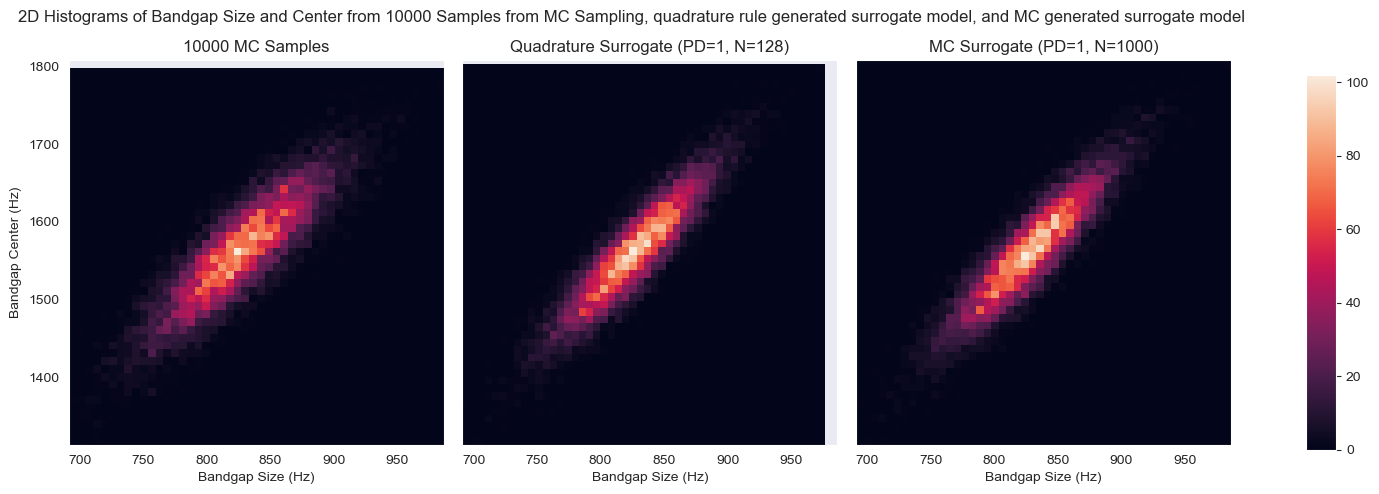

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
pd = 1
hist_mc_samples = axs[0].hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50))
hist_q_gen = axs[1].hist2d(surrogate_outputs_q_bgs[pd].flatten(), surrogate_outputs_q_bgc[pd].flatten(), bins=(50, 50))
hist_mc_gen = axs[2].hist2d(surrogate_outputs_r_bgs[pd].flatten(), surrogate_outputs_r_bgc[pd].flatten(), bins=(50, 50))

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Bandgap Center (Hz)")
axs[0].set_title('10000 MC Samples')
#axs[0].set_aspect('equal')

axs[1].set_xlabel("Bandgap Size (Hz)")
#axs[1].set_ylabel("Bandgap Center (Hz)")
axs[1].set_title('Quadrature Surrogate (PD='+str(pd)+', N='+str(len(bg_size_sample_sets[pd].flatten()))+')')
#axs[1].set_aspect('equal')

axs[2].set_xlabel("Bandgap Size (Hz)")
#axs[2].set_ylabel("Bandgap Center (Hz)")
axs[2].set_title('MC Surrogate (PD='+str(pd)+', N='+str(len(bg_size_MC_sets[1000].flatten()))+')')
#axs[2].set_aspect('equal')

cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
fig.colorbar(hist_mc_gen[3], cax=cbar_ax)
plt.subplots_adjust(wspace=0.05)

title_str = '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model'
fig.suptitle(title_str)